<a href="https://colab.research.google.com/github/ayushh-exe/Sign_Language_Recognization/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estimation of Prediction for getting heart disease using Logistic                        Regression Model of Machine Learning**

# **1. Getting the Dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
heart_data= pd.read_csv('/content/framingham.csv')
heart_data.head(15)
#print(str(len(heart_data.index)))


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


# **2. Plotting the Graphs**

<Axes: xlabel='prevalentStroke', ylabel='count'>

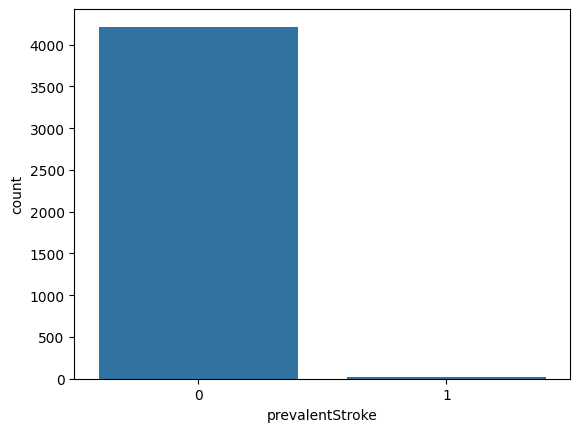

In [ ]:
sns.countplot(x="prevalentStroke", data=heart_data)

<Axes: xlabel='prevalentHyp', ylabel='count'>

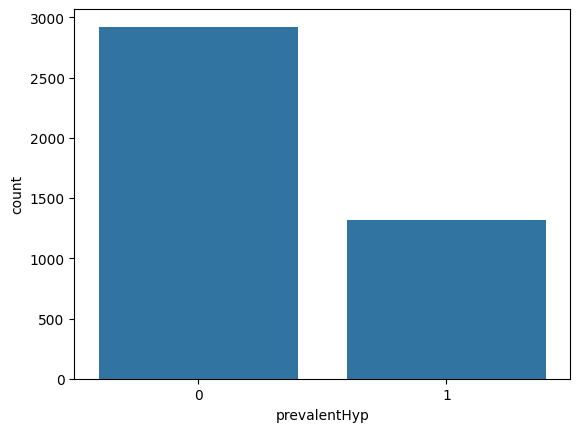

In [ ]:
sns.countplot(x="prevalentHyp", data=heart_data)

<Axes: ylabel='Frequency'>

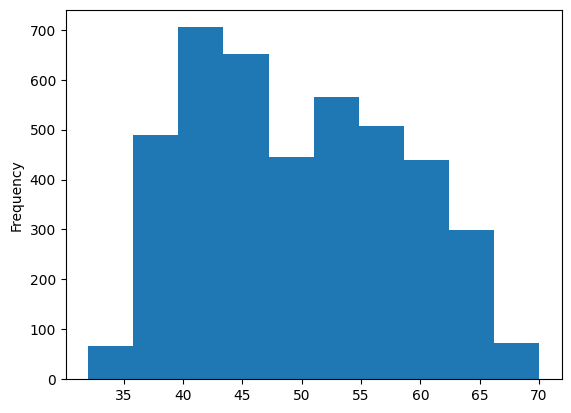

In [ ]:
heart_data["age"].plot.hist()

<Axes: ylabel='Frequency'>

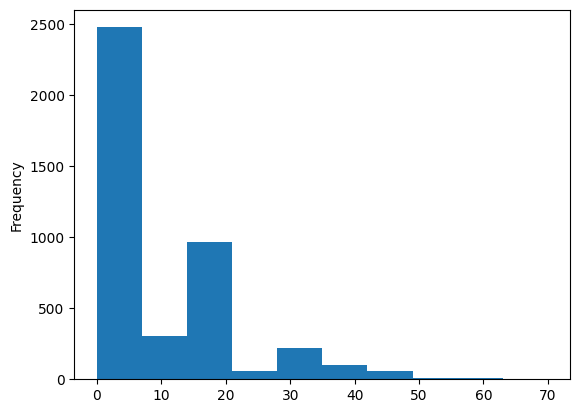

In [ ]:
heart_data["cigsPerDay"].plot.hist()

<Axes: ylabel='Frequency'>

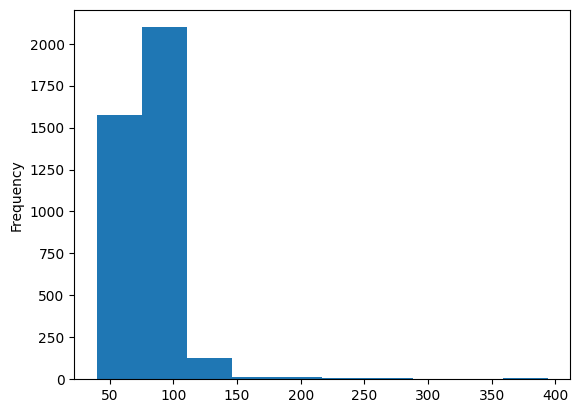

In [ ]:
heart_data["glucose"].plot.hist()

<Axes: xlabel='TenYearCHD', ylabel='count'>

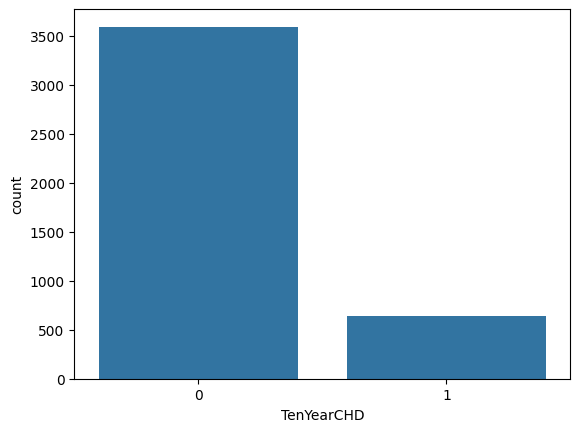

In [ ]:
sns.countplot(x="TenYearCHD", data=heart_data)

# **3. Finding the Null values**

In [ ]:
heart_data.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
heart_data.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


# **4. Plot the Heatmap**

<Axes: >

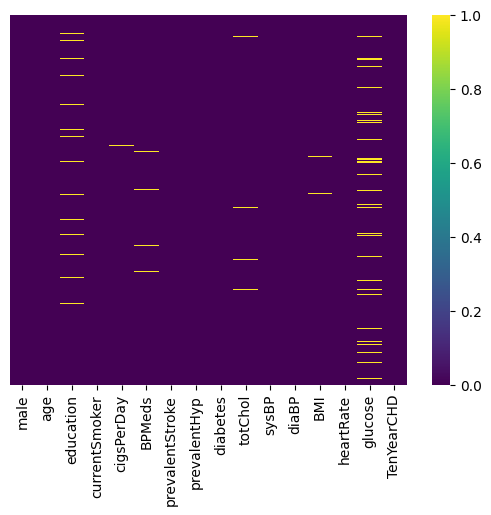

In [ ]:
sns.heatmap(heart_data.isnull(), yticklabels=False, cmap="viridis")

# **5. Droping the values**

In [ ]:
heart_data.drop("education", axis=1, inplace=True)
heart_data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
m=np.mean(heart_data["glucose"])
print(m)

81.96365524402907


# **6. Replacing the Null Values**

In [ ]:

# Ensure m is defined (example: mean of glucose column)
m = heart_data["glucose"].mean()

# Replace NaN values in specific columns
heart_data["glucose"] = heart_data["glucose"].fillna(m)
heart_data["BMI"] = heart_data["BMI"].fillna(25)
heart_data["cigsPerDay"] = heart_data["cigsPerDay"].fillna(5)
heart_data["heartRate"] = heart_data["heartRate"].fillna(90)

# Drop the 'currentSmoker' column if it exists
heart_data.drop("currentSmoker", axis=1, inplace=True, errors="ignore")

# Optionally check the results
print(heart_data.head())


   male  age  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0     1   39         0.0     0.0                0             0         0   
1     0   46         0.0     0.0                0             0         0   
2     1   48        20.0     0.0                0             0         0   
3     0   61        30.0     0.0                0             1         0   
4     0   46        23.0     0.0                0             0         0   

   totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
0    195.0  106.0   70.0  26.97       80.0     77.0           0  
1    250.0  121.0   81.0  28.73       95.0     76.0           0  
2    245.0  127.5   80.0  25.34       75.0     70.0           0  
3    225.0  150.0   95.0  28.58       65.0    103.0           1  
4    285.0  130.0   84.0  23.10       85.0     85.0           0  


<Axes: ylabel='Frequency'>

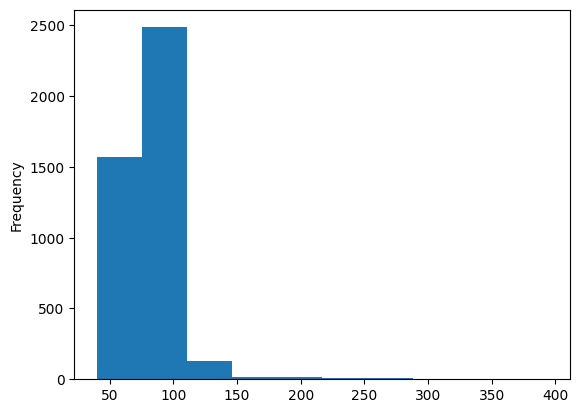

In [ ]:
heart_data["glucose"].plot.hist()

In [ ]:
heart_data.head(10)

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


<Axes: >

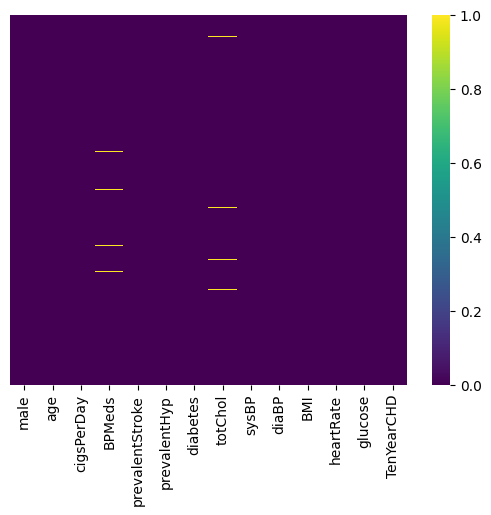

In [ ]:
sns.heatmap(heart_data.isnull(), yticklabels=False, cmap="viridis")

In [ ]:
heart_data["totChol"] = heart_data["totChol"].fillna(247.0)
heart_data = heart_data.drop(columns=["BPMeds"])


<Axes: >

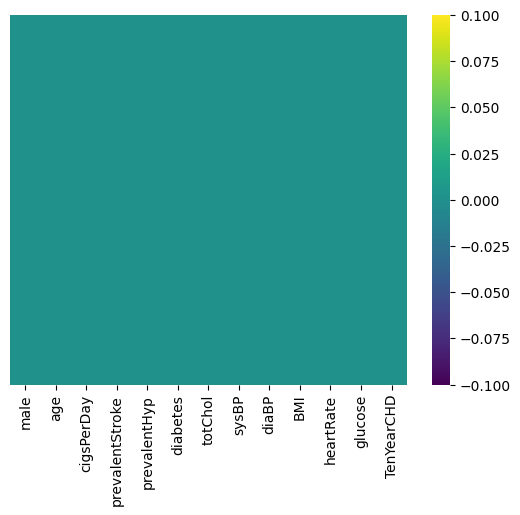

In [ ]:
sns.heatmap(heart_data.isnull(), yticklabels=False, cmap="viridis")


In [ ]:
heart_data.isnull().sum()

,0
male,0
age,0
cigsPerDay,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0
diaBP,0
BMI,0


<Axes: xlabel='TenYearCHD', ylabel='count'>

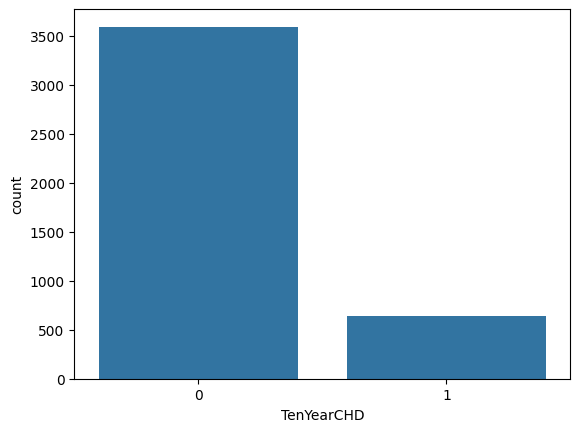

In [ ]:
sns.countplot(x="TenYearCHD", data=heart_data)

In [ ]:
X=heart_data.drop("TenYearCHD",axis=1)
y=heart_data["TenYearCHD"].values
y

array([0, 0, 0, ..., 0, 0, 0])

# **7. Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=15)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=100000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

#Normalize the data attributes for the Iris dataset.
from sklearn.datasets import load_iris
from sklearn import preprocessing
# load the iris dataset
iris = load_iris()
print(iris.data.shape)
# separate the data from the target attributes
X = iris.data
y = iris.target
# normalize the data attributes
normalized_X = preprocessing.normalize(X)


(150, 4)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print('Accuracy Score : {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('Precision Score : ' + str(precision_score(y_test, y_pred, average='weighted')))
print('Recall Score : ' + str(recall_score(y_test, y_pred, average='weighted')))
print('F1 Score : ' + str(f1_score(y_test, y_pred, average='weighted')))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test, y_pred)))


Accuracy Score : 86.67%
Precision Score : 0.8408300861361772
Recall Score : 0.8667452830188679
F1 Score : 0.823527686739255
Confusion Matrix : 
[[722   7]
 [106  13]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the Logistic Regression model
clf = LogisticRegression(solver='liblinear')  # Use 'liblinear' since 'l1' is not supported by default solver

# Define parameter grid
grid_values = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25, 15, 100]}

# Set up GridSearchCV with accuracy as the scoring metric
grid_clf_acc = GridSearchCV(clf, param_grid=grid_values, scoring='accuracy', cv=5)  # 5-fold cross-validation

# Fit GridSearchCV
grid_clf_acc.fit(X_train, y_train)

# Best parameters and accuracy score from GridSearchCV
print("Best Parameters:", grid_clf_acc.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}%".format(grid_clf_acc.best_score_ * 100))

# Predict values based on the best parameters
y_pred = grid_clf_acc.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Test Set Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)


Best Parameters: {'C': 15, 'penalty': 'l2'}
Best Cross-Validation Accuracy: 85.14%
Test Set Accuracy: 86.79%
Confusion Matrix:
 [[723   6]
 [106  13]]


# **8.Accuracy Score**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 86.79%
